<a href="https://colab.research.google.com/github/pojakgol/machine-learning-bootcamp/blob/main/supervised/04_model_selection/02_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
import plotly.express as px

np.random.seed(42)
sns.set(font_scale=1.3)

In [2]:
raw_data = make_moons(n_samples=700, noise=0.25, random_state=42)
data = raw_data[0]
target = raw_data[1]

In [3]:
df = pd.DataFrame(data=np.c_[data, target], columns=['x1', 'x2', 'target'])
df.head()

,x1,x2,target
0,-0.159950,1.036386,0.0
1,1.131141,-0.587636,1.0
2,0.169666,0.094209,1.0
3,0.517728,0.815187,0.0
4,-0.680021,0.155635,0.0


In [4]:
px.scatter(df, x='x1', y='x2', color='target', width=700, height=400)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

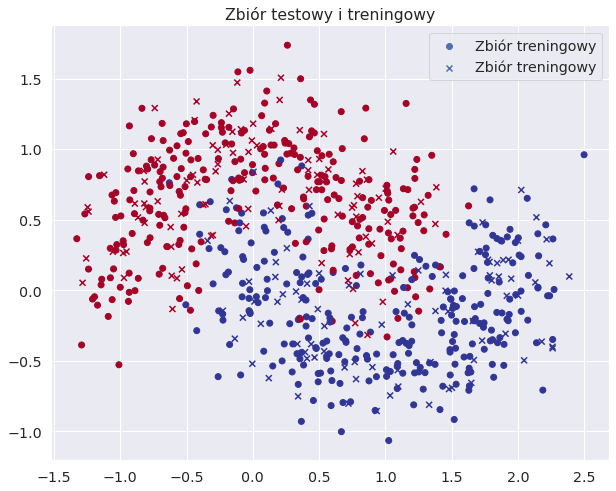

In [11]:
plt.figure(figsize=(10, 8))
plt.title('Zbiór testowy i treningowy')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdYlBu', label='Zbiór treningowy')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdYlBu', label='Zbiór treningowy', marker='x')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



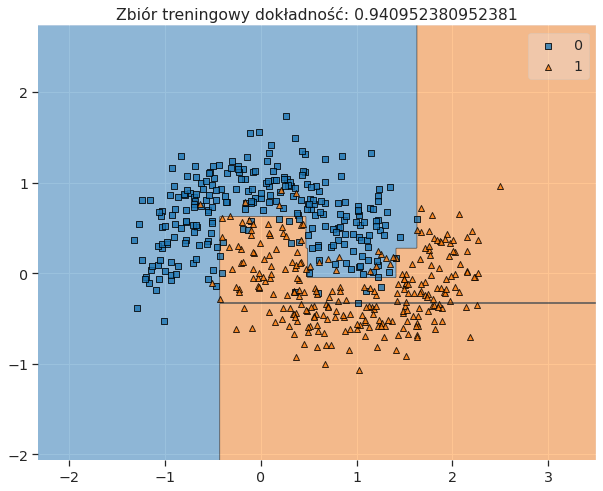

In [12]:
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions

classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=5)
classifier.fit(X_train, y_train)

plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, classifier)
plt.title(f'Zbiór treningowy dokładność: {classifier.score(X_train, y_train)}')
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



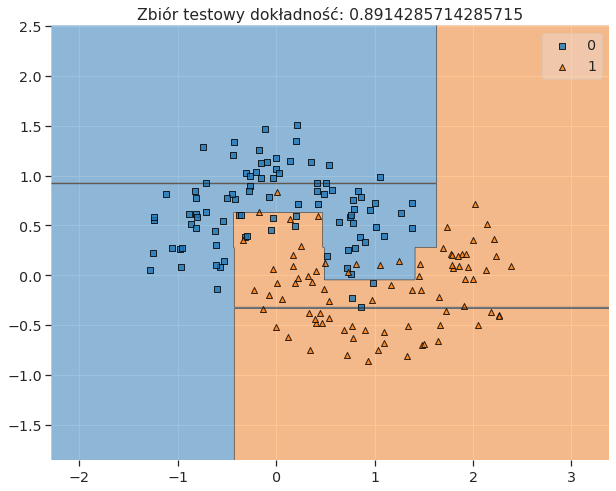

In [13]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, classifier)
plt.title(f'Zbiór testowy dokładność: {classifier.score(X_test, y_test)}')
plt.show()

#Walidacja krzyżowa

In [14]:
from sklearn.model_selection import cross_val_score

classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=5)

scores = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
scores

array([0.86792453, 0.88679245, 0.94339623, 0.9245283 , 0.98113208,
       0.92307692, 0.94230769, 0.96153846, 0.88461538, 0.88461538])

In [15]:
scores = pd.DataFrame(scores, columns=['accuracy'])
scores

,accuracy
0,0.867925
1,0.886792
2,0.943396
3,0.924528
4,0.981132
5,0.923077
6,0.942308
7,0.961538
8,0.884615
9,0.884615


In [16]:
px.bar(scores, y='accuracy', color='accuracy', width=700, height=400,
       title='Walidacja krzyżowa', color_continuous_scale=px.colors.sequential.Inferno_r, range_color=[scores.min()[0] - 0.01, 1.0])